In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pyplot
import seaborn as sns

In [4]:
data = pd.read_csv('Coins.csv')

In [5]:
data.head()

,Coin Name,Symbol,Launch Date,Token Address,Current Price (USD),Market Cap (USD),Trading Volume (24h),Circulating Supply,Total Supply,Price Change (24h),All-Time High (Price),All-Time Low (Price),Number of Holders,Transactions Count,Token Liquidity (USD),Returns (%)
0,LOLToken,$PEPE,2022-06-25,addr174,0.0004,63083,40461,149039448,276088120,5.18,0.0192,0.0094,14525,21152,20294,104.26
1,LOLToken,$GIGGLE,2022-06-25,addr971,0.0066,172527,41989,72595884,282099687,-4.32,0.0149,0.0062,14936,8315,48049,140.32
2,LOLToken,$MOONWAG,2023-03-30,addr17,0.0024,284297,30320,93485313,145296439,9.29,0.0179,0.0087,3451,35331,25786,105.75
3,DogeSun,$MEOW,2023-02-12,addr921,0.0079,212514,25102,63174111,69487501,-1.21,0.0130,0.0088,14670,40268,89482,47.73
4,ChadCoin,$PEPE,2023-08-20,addr454,0.0046,191355,8335,92572750,213155048,4.87,0.0029,0.0016,8609,46232,11101,81.25


In [6]:
data.tail()

,Coin Name,Symbol,Launch Date,Token Address,Current Price (USD),Market Cap (USD),Trading Volume (24h),Circulating Supply,Total Supply,Price Change (24h),All-Time High (Price),All-Time Low (Price),Number of Holders,Transactions Count,Token Liquidity (USD),Returns (%)
2995,ShibaLight,$SHIBA,2022-11-20,addr257,0.0031,379356,26219,71740426,131526453,13.82,0.0093,0.0041,11409,23078,84011,126.83
2996,SolDog,$JOKESOL,2022-12-15,addr98,0.0049,332947,5665,120088312,54106057,18.74,0.0067,0.0020,13411,32241,45218,235.00
2997,MemeFlare,$WOOFSOL,2022-11-20,addr787,0.0024,239872,28480,152659850,207011692,-7.80,0.0124,0.0065,4344,38105,36839,90.77
2998,InuSpark,$INUSPARK,2021-04-05,addr975,0.0056,236052,37749,182447566,56019196,19.58,0.0132,0.0064,8455,40246,95679,106.25
2999,FlokiSol,$LOL,2023-01-18,addr922,0.0003,126349,12211,55356407,214492589,14.05,0.0160,0.0072,11868,6349,43600,122.22


In [7]:
data.shape

(3000, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Coin Name              3000 non-null   object 
 1   Symbol                 3000 non-null   object 
 2   Launch Date            3000 non-null   object 
 3   Token Address          3000 non-null   object 
 4   Current Price (USD)    3000 non-null   float64
 5   Market Cap (USD)       3000 non-null   int64  
 6   Trading Volume (24h)   3000 non-null   int64  
 7   Circulating Supply     3000 non-null   int64  
 8   Total Supply           3000 non-null   int64  
 9   Price Change (24h)     3000 non-null   float64
 10  All-Time High (Price)  3000 non-null   float64
 11  All-Time Low (Price)   3000 non-null   float64
 12  Number of Holders      3000 non-null   int64  
 13  Transactions Count     3000 non-null   int64  
 14  Token Liquidity (USD)  3000 non-null   int64  
 15  Retu

In [11]:
print(data.columns)

Index(['Coin Name', 'Symbol', 'Launch Date', 'Token Address',
       'Current Price (USD)', 'Market Cap (USD)', 'Trading Volume (24h)',
       'Circulating Supply', 'Total Supply', 'Price Change (24h)',
       'All-Time High (Price)', 'All-Time Low (Price)', 'Number of Holders',
       'Transactions Count', 'Token Liquidity (USD)', 'Returns (%)'],
      dtype='object')


In [12]:
data['Coin Name'] = data['Coin Name'].str.strip()


In [13]:
data['Symbol'] = data['Symbol'].str.strip()


In [14]:
data['Launch Date'] = pd.to_datetime(data['Launch Date'], errors='coerce')  # invalid dates become NaT


In [15]:
numeric_cols = ['Current Price (USD)', 'Market Cap (USD)', 'Trading Volume (24h)',
                'Circulating Supply', 'Total Supply', 'Price Change (24h)',
                'All-Time High (Price)', 'All-Time Low (Price)',
                'Number of Holders', 'Transactions Count', 'Token Liquidity (USD)', 'Returns (%)']


In [17]:
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


In [18]:
# Handle missing values
# Option 1: Drop rows with essential missing info
data = data.dropna(subset=['Coin Name', 'Symbol', 'Token Address', 'Current Price (USD)'])


In [19]:
fill_zero_cols = ['Trading Volume (24h)', 'Market Cap (USD)', 'Token Liquidity (USD)']
data[fill_zero_cols] = data[fill_zero_cols].fillna(0)


In [20]:
# Remove duplicates based on Token Address
data = data.drop_duplicates(subset=['Token Address'])

In [21]:
data = data[data['Current Price (USD)'] > 0]
data = data[data['Market Cap (USD)'] >= 0]
data = data[data['Circulating Supply'] >= 0]
data = data[data['Total Supply'] >= 0]
data = data[data['Number of Holders'] >= 0]
data = data[data['Transactions Count'] >= 0]

In [22]:
# Optional: Check consistency for all-time high/low
data = data[data['All-Time High (Price)'] >= data['All-Time Low (Price)']]
data = data[data['Current Price (USD)'].between(data['All-Time Low (Price)'], data['All-Time High (Price)'])]


In [23]:
data.reset_index(drop=True, inplace=True)


In [24]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Coin Name              362 non-null    object        
 1   Symbol                 362 non-null    object        
 2   Launch Date            362 non-null    datetime64[ns]
 3   Token Address          362 non-null    object        
 4   Current Price (USD)    362 non-null    float64       
 5   Market Cap (USD)       362 non-null    int64         
 6   Trading Volume (24h)   362 non-null    int64         
 7   Circulating Supply     362 non-null    int64         
 8   Total Supply           362 non-null    int64         
 9   Price Change (24h)     362 non-null    float64       
 10  All-Time High (Price)  362 non-null    float64       
 11  All-Time Low (Price)   362 non-null    float64       
 12  Number of Holders      362 non-null    int64         
 13  Trans

In [25]:
print(data.describe())

                         Launch Date  Current Price (USD)  Market Cap (USD)  \
count                            362           362.000000        362.000000   
mean   2022-12-11 21:56:41.104972544             0.006517     281817.392265   
min              2021-04-05 00:00:00             0.000400      50367.000000   
25%              2022-09-10 00:00:00             0.004725     175836.250000   
50%              2023-01-18 00:00:00             0.006950     284755.000000   
75%              2023-05-20 00:00:00             0.008600     390178.500000   
max              2023-09-05 00:00:00             0.010000     499537.000000   
std                              NaN             0.002403     130119.756902   

       Trading Volume (24h)  Circulating Supply  Total Supply  \
count            362.000000        3.620000e+02  3.620000e+02   
mean           26641.602210        1.259010e+08  1.733823e+08   
min             5165.000000        5.224622e+07  5.046199e+07   
25%            14805.750000 

In [26]:
data['Returns (%)'] = data['Current Price (USD)'].pct_change() * 100

In [27]:
data['Active'] = data['Trading Volume (24h)'] > 0
active_coins = data[data['Active']]
print(f"Number of active coins: {active_coins.shape[0]}")

Number of active coins: 362


In [28]:
duplicate_symbols = data[data.duplicated(subset=['Symbol'], keep=False)]
print(duplicate_symbols)

    Coin Name       Symbol Launch Date Token Address  Current Price (USD)  \
0    LOLToken      $GIGGLE  2022-06-25       addr971               0.0066   
1    ShibaSol  $SHIBALIGHT  2022-08-15       addr733               0.0071   
2     JokeSol      $GIGGLE  2023-07-10       addr155               0.0092   
3    ShibaSol     $DOGESUN  2021-04-05       addr122               0.0037   
4    ChadCoin      $SOLDOG  2022-12-15       addr173               0.0094   
..        ...          ...         ...           ...                  ...   
357    SolDog     $JOKESOL  2023-06-15       addr256               0.0044   
358  InuSpark        $CHAD  2022-12-15       addr296               0.0052   
359  ShibaSol        $PEPE  2022-12-25       addr719               0.0058   
360    PugInu   $MEMEFLARE  2021-04-05       addr755               0.0061   
361  FlokiSol       $FLOKI  2023-03-30       addr528               0.0073   

     Market Cap (USD)  Trading Volume (24h)  Circulating Supply  Total Supp

In [29]:
# Fill missing Launch Date with first recorded price date if available
data['Launch Date'] = data['Launch Date'].fillna(data.groupby('Token Address')['Launch Date'].transform('min'))


In [30]:
data['Coin Name'] = data['Coin Name'].str.upper().str.strip()
data['Symbol'] = data['Symbol'].str.upper().str.strip()


In [31]:
from scipy import stats

numeric_cols = ['Current Price (USD)', 'Market Cap (USD)', 'Trading Volume (24h)', 'Token Liquidity (USD)']
z_scores = np.abs(stats.zscore(data[numeric_cols].fillna(0)))
data = data[(z_scores < 3).all(axis=1)]  # remove extreme outliers
data.reset_index(drop=True, inplace=True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Coin Name              362 non-null    object        
 1   Symbol                 362 non-null    object        
 2   Launch Date            362 non-null    datetime64[ns]
 3   Token Address          362 non-null    object        
 4   Current Price (USD)    362 non-null    float64       
 5   Market Cap (USD)       362 non-null    int64         
 6   Trading Volume (24h)   362 non-null    int64         
 7   Circulating Supply     362 non-null    int64         
 8   Total Supply           362 non-null    int64         
 9   Price Change (24h)     362 non-null    float64       
 10  All-Time High (Price)  362 non-null    float64       
 11  All-Time Low (Price)   362 non-null    float64       
 12  Number of Holders      362 non-null    int64         
 13  Trans

In [32]:
df = data[data['Current Price (USD)'].between(data['All-Time Low (Price)'], data['All-Time High (Price)'])]
df.reset_index(drop=True, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Coin Name              362 non-null    object        
 1   Symbol                 362 non-null    object        
 2   Launch Date            362 non-null    datetime64[ns]
 3   Token Address          362 non-null    object        
 4   Current Price (USD)    362 non-null    float64       
 5   Market Cap (USD)       362 non-null    int64         
 6   Trading Volume (24h)   362 non-null    int64         
 7   Circulating Supply     362 non-null    int64         
 8   Total Supply           362 non-null    int64         
 9   Price Change (24h)     362 non-null    float64       
 10  All-Time High (Price)  362 non-null    float64       
 11  All-Time Low (Price)   362 non-null    float64       
 12  Number of Holders      362 non-null    int64         
 13  Trans

In [33]:
data = data[data['Circulating Supply'] <= data['Total Supply']]


In [34]:
num_cols = ['Market Cap (USD)', 'Trading Volume (24h)', 'Token Liquidity (USD)']
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
    data[col] = data[col].clip(lower=0)  # Ensure no negative values
    data[col] = data[col].astype(float)
    print(f"{col} - Missing values after cleaning: {data[col].isna().sum()}")

Market Cap (USD) - Missing values after cleaning: 0
Trading Volume (24h) - Missing values after cleaning: 0
Token Liquidity (USD) - Missing values after cleaning: 0


In [41]:
print(data.columns)

Index(['Coin Name', 'Symbol', 'Launch Date', 'Token Address',
       'Current Price (USD)', 'Market Cap (USD)', 'Trading Volume (24h)',
       'Circulating Supply', 'Total Supply', 'Price Change (24h)',
       'All-Time High (Price)', 'All-Time Low (Price)', 'Number of Holders',
       'Transactions Count', 'Token Liquidity (USD)', 'Returns (%)', 'Active'],
      dtype='object')


In [42]:
data['Coin Name'] = data['Coin Name'].fillna('UNKNOWN')
data['Symbol'] = data['Symbol'].fillna('UNKNOWN')
data['Token Address'] = data['Token Address'].fillna('UNKNOWN')
data['Launch Date'] = data['Launch Date'].fillna(pd.Timestamp('1970-01-01'))



In [43]:
data['Market Cap per Holder'] = data['Market Cap (USD)'] / data['Number of Holders']


In [44]:
data['Liquidity Ratio'] = data['Token Liquidity (USD)'] / data['Market Cap (USD)']


In [45]:
data['Price Range Ratio'] = (data['All-Time High (Price)'] - data['All-Time Low (Price)']) / data['All-Time Low (Price)']


In [46]:
data['Coin Age (days)'] = (pd.Timestamp.today() - data['Launch Date']).dt.days


In [47]:
data['Active'] = data['Trading Volume (24h)'] > 0


In [48]:
for col in ['Current Price (USD)', 'Market Cap (USD)', 'Circulating Supply', 'Total Supply', 'Token Liquidity (USD)']:
    data = data[data[col] >= 0]
    data[col] = data[col].astype(float)
    data[col] = data[col].fillna(data[col].median())
    print(f"{col} - Missing values after final cleaning: {data[col].isna().sum()}")


Current Price (USD) - Missing values after final cleaning: 0
Market Cap (USD) - Missing values after final cleaning: 0
Circulating Supply - Missing values after final cleaning: 0
Total Supply - Missing values after final cleaning: 0
Token Liquidity (USD) - Missing values after final cleaning: 0


In [55]:
print(data.describe())


                      Launch Date  Current Price (USD)  Market Cap (USD)  \
count                         250           250.000000        250.000000   
mean   2022-12-03 01:49:26.400000             0.006596     286195.764000   
min           2021-04-05 00:00:00             0.000800      50367.000000   
25%           2022-08-15 00:00:00             0.004900     181850.750000   
50%           2023-01-05 00:00:00             0.006900     290353.500000   
75%           2023-05-20 00:00:00             0.008675     399401.000000   
max           2023-09-05 00:00:00             0.010000     499537.000000   
std                           NaN             0.002341     129699.195729   

       Trading Volume (24h)  Circulating Supply  Total Supply  \
count            250.000000        2.500000e+02  2.500000e+02   
mean           26814.364000        1.164912e+08  2.092484e+08   
min             5165.000000        5.224622e+07  6.459456e+07   
25%            14437.750000        8.112790e+07  1.6861

In [57]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 361
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Coin Name              250 non-null    object        
 1   Symbol                 250 non-null    object        
 2   Launch Date            250 non-null    datetime64[ns]
 3   Token Address          250 non-null    object        
 4   Current Price (USD)    250 non-null    float64       
 5   Market Cap (USD)       250 non-null    float64       
 6   Trading Volume (24h)   250 non-null    float64       
 7   Circulating Supply     250 non-null    float64       
 8   Total Supply           250 non-null    float64       
 9   Price Change (24h)     250 non-null    float64       
 10  All-Time High (Price)  250 non-null    float64       
 11  All-Time Low (Price)   250 non-null    float64       
 12  Number of Holders      250 non-null    int64         
 13  Transactio

In [58]:
print(data['Active'].value_counts())

Active
True    250
Name: count, dtype: int64


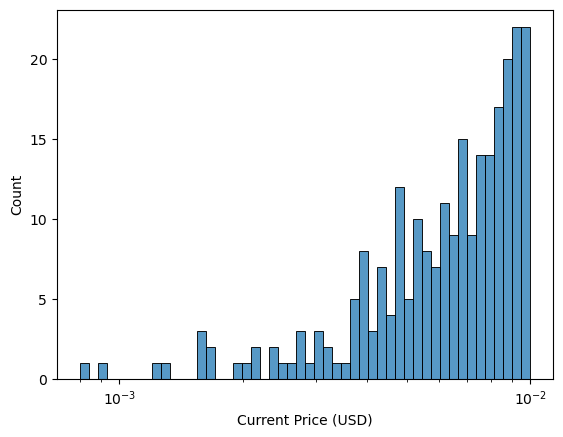

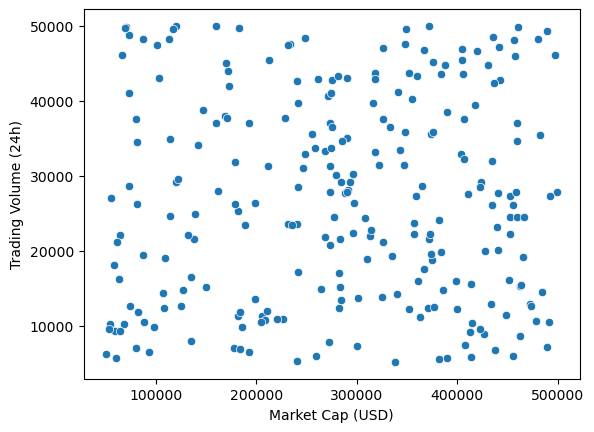

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Current Price
sns.histplot(data['Current Price (USD)'], bins=50, log_scale=True)
plt.show()

# Market Cap vs Trading Volume scatter
sns.scatterplot(x='Market Cap (USD)', y='Trading Volume (24h)', data=data)
plt.show()


In [60]:
data.reset_index(drop=True, inplace=True)


In [62]:
data.to_csv('cleaned_coins.csv', index=False)


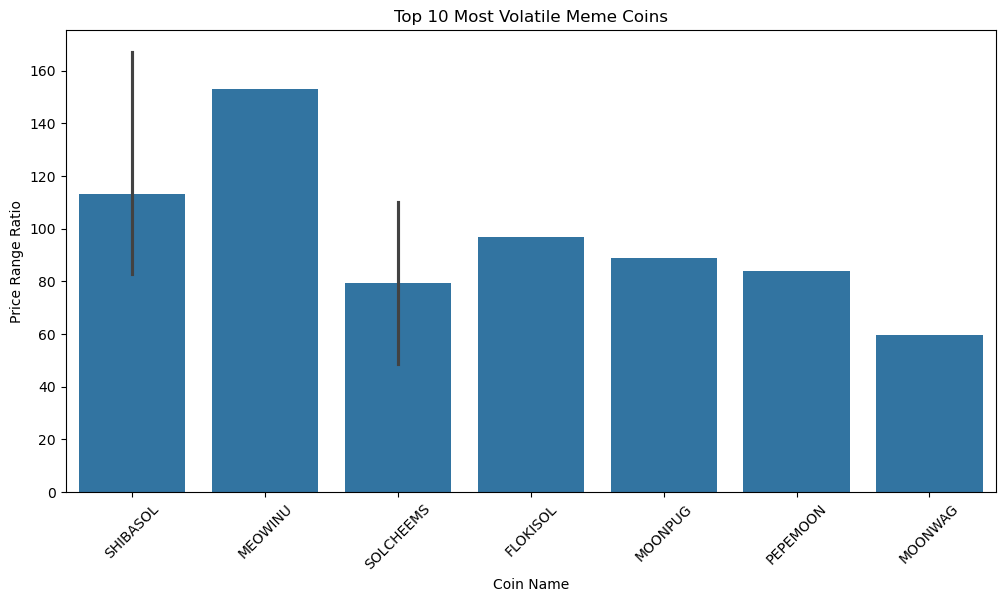

In [67]:
# Most Volatile Coins (by Price Range Ratio)
top_volatility = data.sort_values('Price Range Ratio', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Coin Name', y='Price Range Ratio', data=top_volatility)
plt.xticks(rotation=45)
plt.title('Top 10 Most Volatile Meme Coins')
plt.show()

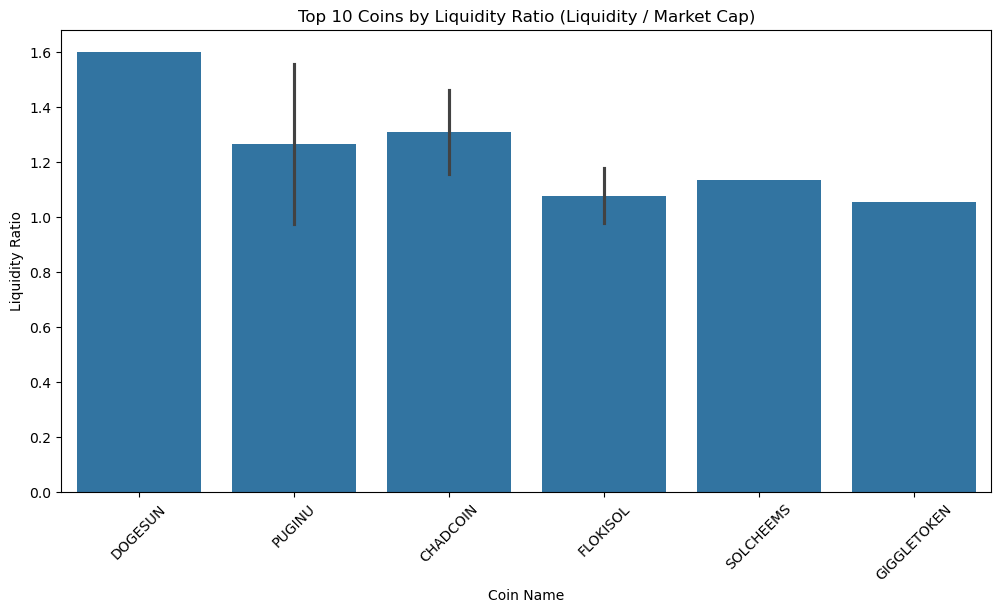

In [68]:
# Coins with Highest Liquidity Ratio
top_liquidity = data.sort_values('Liquidity Ratio', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Coin Name', y='Liquidity Ratio', data=top_liquidity)
plt.xticks(rotation=45)
plt.title('Top 10 Coins by Liquidity Ratio (Liquidity / Market Cap)')
plt.show()

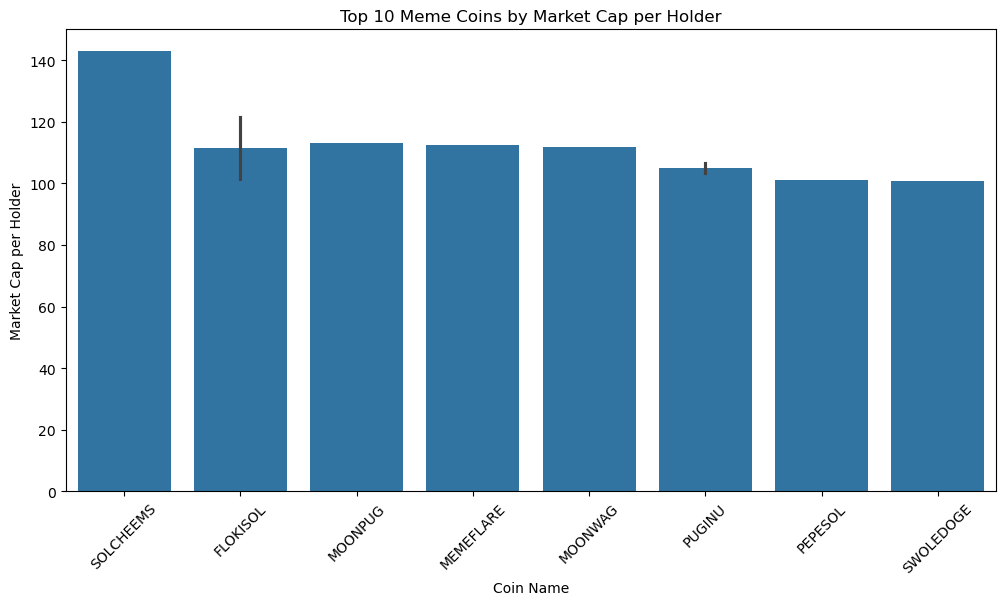

In [69]:
# Top Coins by Market Cap per Holder (Popularity metric)
top_popularity = data.sort_values('Market Cap per Holder', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Coin Name', y='Market Cap per Holder', data=top_popularity)
plt.xticks(rotation=45)
plt.title('Top 10 Meme Coins by Market Cap per Holder')
plt.show()

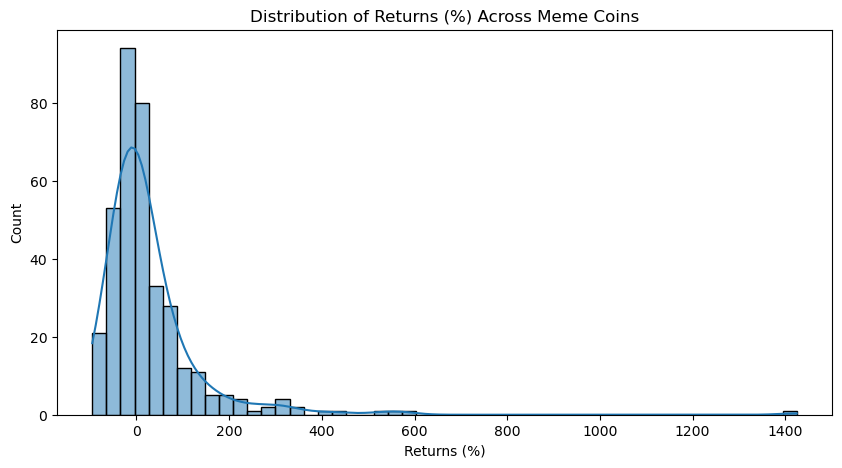

In [70]:
# Returns Analysis
# Distribution of Returns (%)
plt.figure(figsize=(10,5))
sns.histplot(df['Returns (%)'], bins=50, kde=True)
plt.title('Distribution of Returns (%) Across Meme Coins')
plt.show()

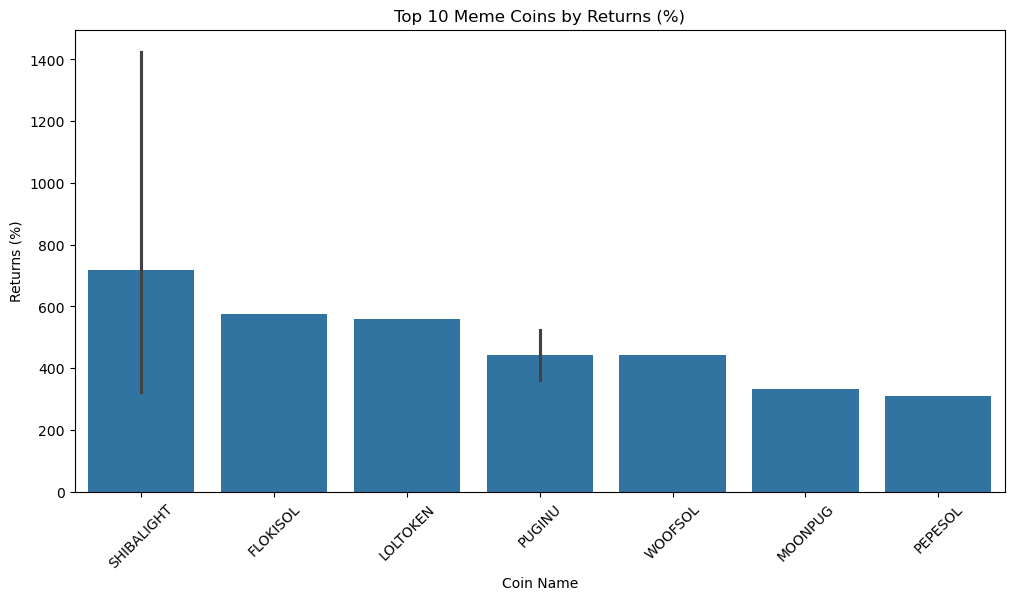

In [71]:
# Top 10 Coins by Returns
top_returns = df.sort_values('Returns (%)', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Coin Name', y='Returns (%)', data=top_returns)
plt.xticks(rotation=45)
plt.title('Top 10 Meme Coins by Returns (%)')
plt.show()


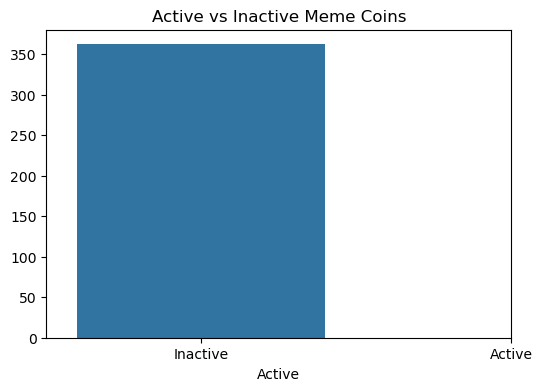

In [72]:
# Active vs Inactive Coins
active_counts = df['Active'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=active_counts.index, y=active_counts.values)
plt.xticks([0,1], ['Inactive', 'Active'])
plt.title('Active vs Inactive Meme Coins')
plt.show()

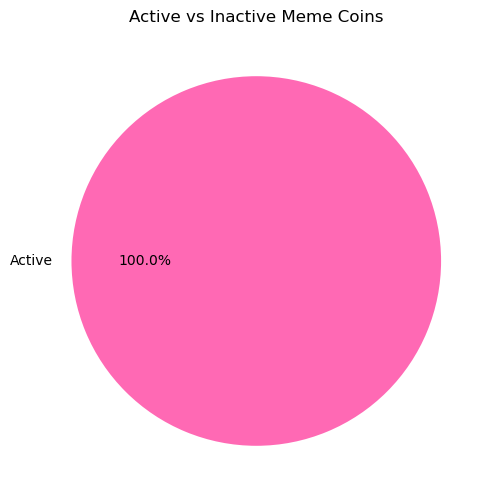

In [75]:
# Count of active vs inactive coins
active_counts = data['Active'].value_counts()

# Generate labels dynamically from the index
labels = active_counts.index.map({True: 'Active', False: 'Inactive'})  # convert boolean to strings

plt.figure(figsize=(6,6))
plt.pie(active_counts, labels=labels, autopct='%1.1f%%', colors=['#ff69b4','#87cefa'])
plt.title('Active vs Inactive Meme Coins')
plt.show()


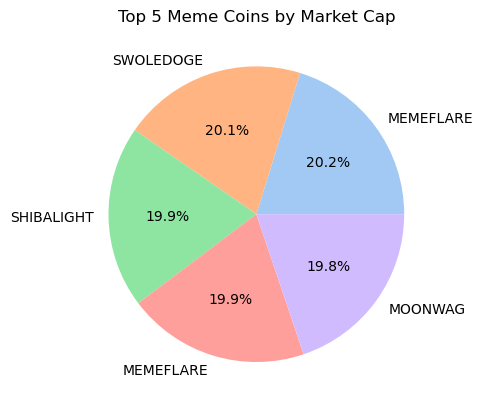

In [76]:
# Top 5 Market Cap Coins Pie Chart
top5_marketcap = data.sort_values('Market Cap (USD)', ascending=False).head(5)
plt.pie(top5_marketcap['Market Cap (USD)'],
        labels=top5_marketcap['Coin Name'],
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel')[0:5])
plt.title('Top 5 Meme Coins by Market Cap')
plt.show()


In [77]:
data.to_csv('cleaned_coins.csv', index=False)
